In [2]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
import sys
print(qt.__version__)


5.0.4


In [7]:

def create_random_state(n):
        basis_states = [qt.basis([2]*n, [int(i) for i in format(j, f'0{n}b')]) for j in range(2**n)]
        
        uniform_values = np.random.uniform(0, 1, 2**n)
        coefficients = uniform_values / np.sqrt(np.sum(uniform_values**2))
    
        random_state = sum(coeff * basis for coeff, basis in zip(coefficients, basis_states))
        return random_state

def compute_density_matrix(state):
        return state * state.dag()
num_qubits = 0



In [8]:
max_qubits = 10
I_N_AVG = np.zeros(max_qubits-2)
f_N_AVG = np.zeros(max_qubits-2)
LOOPS = 50
Z = qt.sigmaz()

c = 0

for loops in range(0,LOOPS):

    I_N = np.zeros(max_qubits-2)
    f_N = np.zeros(max_qubits-2)
    percent = ((loops + 1) / LOOPS) * 100
    sys.stdout.write(f"\rProgress: {percent:.2f}%")
    sys.stdout.flush()

    for num_qubits in range(2,max_qubits):
        
        #----------------------------- State definition

        random_state_1 = create_random_state(num_qubits)
        random_state_2 = create_random_state(num_qubits)
        random_state_3 = create_random_state(num_qubits)

        p_random_1 = compute_density_matrix(random_state_1)
        p_random_2 = compute_density_matrix(random_state_2)
        p_random_3 = compute_density_matrix(random_state_3)

        p_mixed = (1/3) * (p_random_1 + p_random_2 + p_random_3)


        #---------------------------- Mutual information computation
        #---------------------------- Z correlation function computation   
        
        
        Z_full = qt.tensor(*[Z for _ in range(num_qubits)])
        z = np.zeros(num_qubits+1)
        s = np.zeros(num_qubits+1)

        for X in range(0,num_qubits):

            a = p_mixed.ptrace([X])

            s[X] = qt.entropy_vn(a)
            z[X] = np.real((a @ Z).tr())
            a = 0

        s[num_qubits] = qt.entropy_vn(p_mixed)
        I_N[num_qubits-2] = sum(s[:-1]) - s[-1]  

        z[num_qubits] = np.real((p_mixed @ Z_full).tr())
        f_N[num_qubits-2] = (z[-1] -np.prod(z[:-1]))**2/(2*num_qubits) 

    I_N_AVG = I_N_AVG + I_N
    f_N_AVG = f_N_AVG + f_N









Progress: 2.00%

Progress: 100.00%

In [9]:

max_qubits = 10
I_N_AVG_1 = np.zeros(max_qubits-2)
f_N_AVG_1 = np.zeros(max_qubits-2)
LOOPS = 50

c = 0

for loops in range(0,LOOPS):

    I_N_1 = np.zeros(max_qubits-2)
    f_N_1 = np.zeros(max_qubits-2)
    percent = ((loops + 1) / LOOPS) * 100
    sys.stdout.write(f"\rProgress: {percent:.2f}%")
    sys.stdout.flush()

    for num_qubits in range(2,max_qubits):

        
        #----------------------------- State definition

        random_state_1 = create_random_state(num_qubits)
        random_state_2 = create_random_state(num_qubits)
        random_state_3 = create_random_state(num_qubits)

        p_random_1 = compute_density_matrix(random_state_1)
        p_random_2 = compute_density_matrix(random_state_2)
        p_random_3 = compute_density_matrix(random_state_3)

        p_mixed = p_random_1 


        #---------------------------- Mutual information computation
        #---------------------------- Z correlation function computation   
        
        Z = qt.sigmaz()
        Z_full = qt.tensor(*[Z for _ in range(num_qubits)])
        z = np.zeros(num_qubits+1)
        s = np.zeros(num_qubits+1)

        for X in range(0,num_qubits):

            a = p_mixed.ptrace([X])

            s[X] = qt.entropy_vn(a)
            z[X] = np.real((a @ Z).tr())
            a = 0

        s[num_qubits] = qt.entropy_vn(p_mixed)
        I_N_1[num_qubits-2] = sum(s[:-1]) - s[-1]  

        z[num_qubits] = np.real((p_mixed @ Z_full).tr())
        f_N_1[num_qubits-2] = (z[-1] -np.prod(z[:-1]))**2/(2*num_qubits) 


    I_N_AVG_1 = I_N_AVG_1 + I_N_1
    f_N_AVG_1 = f_N_AVG_1 + f_N_1

Progress: 100.00%

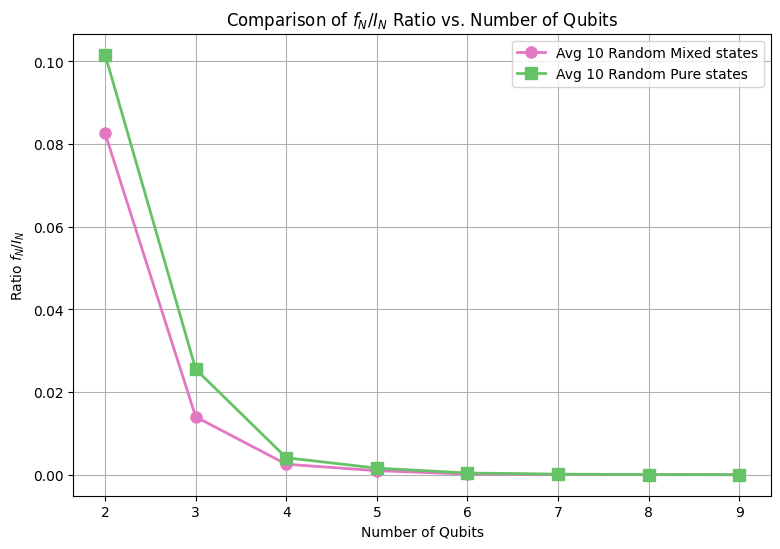

[8.25714213e-02 1.40007605e-02 2.54906211e-03 9.79799401e-04
 1.76756021e-04 7.49472103e-05 1.97298696e-05 8.65564695e-06]
[1.01620358e-01 2.55245834e-02 4.11925142e-03 1.59654175e-03
 4.24994824e-04 1.45417395e-04 5.66978995e-05 2.20153930e-05]


In [10]:


ratio = f_N_AVG / I_N_AVG
ratio_1 = f_N_AVG_1 / I_N_AVG_1


x_axis = np.arange(2, 2 + len(ratio))
x_axis_1 = np.arange(2, 2 + len(ratio_1))


plt.figure(figsize=(9, 6))

plt.plot(x_axis, ratio, color = '#e377c2', marker='o', linestyle='-', linewidth=2, markersize=8, label='Avg 10 Random Mixed states')
plt.plot(x_axis_1, ratio_1, color = '#66c266', marker='s', linestyle='-', linewidth=2, markersize=8, label='Avg 10 Random Pure states')

plt.xlabel('Number of Qubits')
plt.ylabel('Ratio $f_N/I_N$')
plt.title('Comparison of $f_N/I_N$ Ratio vs. Number of Qubits')
plt.grid(True)
plt.xticks(np.union1d(x_axis, x_axis_1))
plt.legend()

plt.show()
print(ratio)
print(ratio_1)

